# Wind Turbine Scada Data

https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

## Introduction

### About dataset

In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

### Columns infomation

* Date/Time (for 10 minutes intervals)
* LV ActivePower (kW): The power generated by the turbine for that moment
* Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
* TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
* Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

### Questions

* 바람이 많이 부는 시간대?
* 발전량이 많은 시간대?
* 바람과 발전량의 관계?
* 이론상 발전량과 실제 발전량과의 차이 및 관계 & 차이가 나는 이유는?
* 주된 바람의 방향은?

## Data Wrangling

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Gathering

In [126]:
df = pd.read_csv('T1.csv')
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


### Data Assessing & Cleaning

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


> Date/Time to datetime data type

In [128]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')
df['Date/Time']

0       2018-01-01 00:00:00
1       2018-01-01 00:10:00
2       2018-01-01 00:20:00
3       2018-01-01 00:30:00
4       2018-01-01 00:40:00
                ...        
50525   2018-12-31 23:10:00
50526   2018-12-31 23:20:00
50527   2018-12-31 23:30:00
50528   2018-12-31 23:40:00
50529   2018-12-31 23:50:00
Name: Date/Time, Length: 50530, dtype: datetime64[ns]

## Exploratory Data Analysis

### Exploration

In [129]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [130]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


### Visualization

Text(0, 0.5, 'Count')

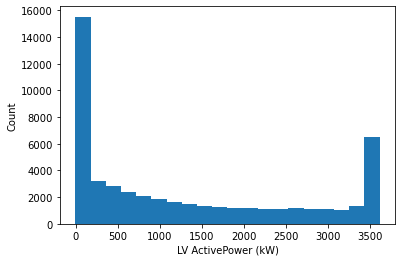

In [131]:
plt.hist(df['LV ActivePower (kW)'], bins=20);
plt.xlabel('LV ActivePower (kW)')
plt.ylabel('Count')

In [132]:
df['LV ActivePower (kW)'].value_counts()

0.000000       10781
3602.670898        5
3602.268066        5
3603.145996        5
3602.216064        5
               ...  
3135.654053        1
3223.466064        1
2877.299072        1
2619.701904        1
2820.466064        1
Name: LV ActivePower (kW), Length: 38764, dtype: int64

> 발전량이 0인 구간이 많다.

Text(0, 0.5, 'Wind Speed (m/s)')

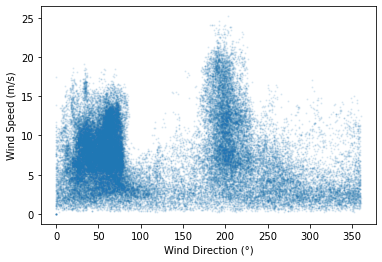

In [133]:
plt.scatter('Wind Direction (°)','Wind Speed (m/s)',data=df, alpha=0.1, marker='.', s=5)
plt.xlabel('Wind Direction (°)')
plt.ylabel('Wind Speed (m/s)')

### Answers to questions

#### 주된 바람의 방향은?

Text(0, 0.5, 'Count')

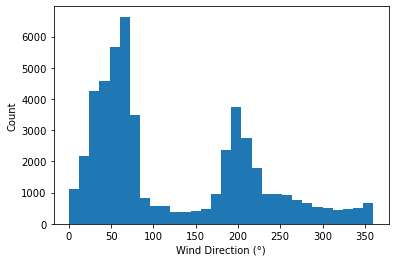

In [134]:
plt.hist(df['Wind Direction (°)'], bins=30);
plt.xlabel('Wind Direction (°)')
plt.ylabel('Count')

>NE 방향(50도)와 SSW 방향(200도)에 많은 바람이 분포하고 있음을 볼 수 있다.  
>1년 중 바람의 방향은 어떻게 바뀔까?

/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_62907/3442542812.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date('Date/Time', 'Wind Direction (°)', data=df, alpha=0.01, marker='.')


Text(0, 0.5, 'Wind Direction (°)')

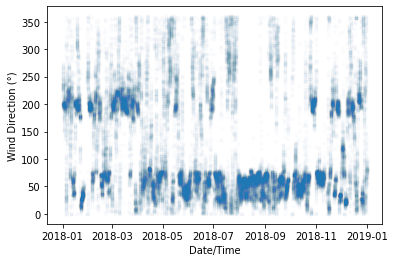

In [135]:
plt.plot_date('Date/Time', 'Wind Direction (°)', data=df, alpha=0.01, marker='.')
plt.xlabel('Date/Time')
plt.ylabel('Wind Direction (°)')

>계절에 따라 주된 바람의 방향이 바뀌는 것을 알 수 있었다.  
>11월 ~ 4월 : SSW  
>4월 ~ 11월 : NE

#### 바람이 많이 부는 시간대?

In [136]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [137]:
df['Hour'] = df['Date/Time'].dt.hour
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,23


In [138]:
group_hour = df.groupby('Hour', as_index=False).mean()
group_hour

,Hour,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,0,1385.044023,7.850671,1568.735677,133.480092
1,1,1375.151801,7.885823,1568.980273,131.191982
2,2,1382.937343,7.886549,1575.770090,131.531560
3,3,1375.325266,7.890250,1578.654134,130.114486
4,4,1393.639176,7.885168,1588.432064,128.740767
5,5,1323.467826,7.681868,1515.403518,127.089092
6,6,1243.540404,7.351122,1417.321563,124.988257
7,7,1178.739047,7.093343,1343.307290,124.730761
8,8,1091.950881,6.923616,1267.907163,123.608422
9,9,1066.081309,6.852548,1245.238778,121.295697


Text(0, 0.5, 'Wind Speed (m/s)')

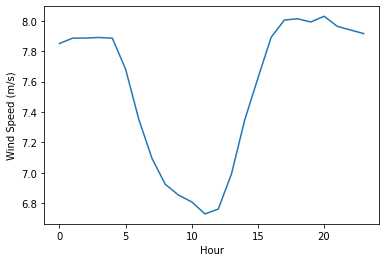

In [139]:
plt.plot('Hour','Wind Speed (m/s)',data=group_hour)
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')

>5시부터 바람이 약해지기 시작해서 11시 쯤 바람이 가장 약해지고 이후 16시까지 바람이 다시 강해진다.

#### 발전량이 많은 시간대?

Text(0, 0.5, 'Wind Speed (m/s)')

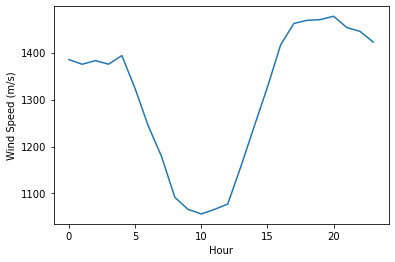

In [140]:
plt.plot('Hour','LV ActivePower (kW)',data=group_hour)
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')

>하루 중 시간에 따른 발전량은 바람 속도의 경향과 거의 일치한다.

#### 바람과 발전량의 관계?

In [141]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,23


Text(0, 0.5, 'LV ActivePower (kW)')

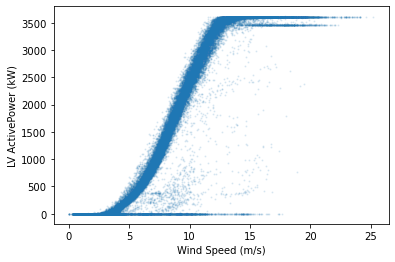

In [142]:
plt.scatter('Wind Speed (m/s)','LV ActivePower (kW)',data=df, alpha=0.1, marker='.', s=5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')

>* 풍속이 15 m/s까지 빨라져도 발전량이 0인 부분이 있다.
>* 또한 바람이 아무리 빨라져도 발전량은 약 3600 이상으로 높아지지 않는다.
>* 위와 같은 특이점들을 제외하면 풍속과 발전량 사이의 확실한 양의 상관관계를 발견할 수 있다. (지수 또는 선형)

>바람이 불어도 발전량이 0인 구간이 가지는 특징은?

In [143]:
zero_with_wind = df[(df['LV ActivePower (kW)']==0)&(df['Wind Speed (m/s)']>5)]
zero_with_wind

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour
505,2018-01-04 15:00:00,0.0,5.160032,376.309166,81.873100,15
506,2018-01-04 15:10:00,0.0,5.161473,376.681373,62.481461,15
507,2018-01-04 15:20:00,0.0,5.414982,444.872137,61.627480,15
508,2018-01-04 15:30:00,0.0,6.778621,919.369570,67.967583,15
1475,2018-01-11 09:20:00,0.0,10.971560,3262.307881,167.217804,9
...,...,...,...,...,...,...
50259,2018-12-30 02:50:00,0.0,5.219294,391.756574,16.187691,2
50260,2018-12-30 03:00:00,0.0,5.114045,364.518866,14.416500,3
50262,2018-12-30 03:20:00,0.0,5.639882,510.154176,359.656494,3
50263,2018-12-30 03:30:00,0.0,5.294488,411.777277,16.026070,3


Text(0, 0.5, 'Count')

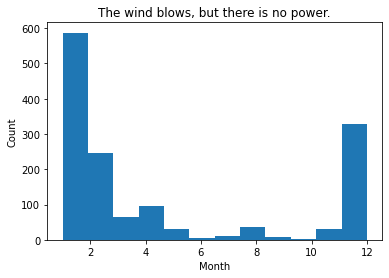

In [157]:
plt.hist(zero_with_wind['Date/Time'].dt.month, bins=12)
plt.title('The wind blows, but there is no power.')
plt.xlabel('Month')
plt.ylabel('Count')

In [145]:
zero_with_wind['Date/Time'].dt.month.value_counts()

1     587
12    329
2     245
4      97
3      64
8      37
5      32
11     32
7      11
9       8
6       5
10      3
Name: Date/Time, dtype: int64

>* 1월, 12월, 2월에는 바람이 있어도 발전량이 0인 경우가 다른 시기에 비해 많다.
>* 겨울철의 낮은 기온이 터빈에 결빙 등의 문제를 일으키는 것으로 추측된다.

#### 이론상 발전량과 실제 발전량과의 차이 및 관계 & 차이가 나는 이유는?

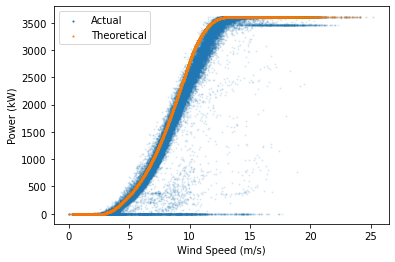

In [146]:
plt.scatter('Wind Speed (m/s)','LV ActivePower (kW)',data=df, alpha=0.1, marker='.', s=5, label='Actual')
plt.scatter('Wind Speed (m/s)','Theoretical_Power_Curve (KWh)',data=df, alpha=0.1, marker='.', s=5, label='Theoretical')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

>* 풍속이 높은 구간 (9 ~ 12 m/s)에서 이론값보다 실제값이 더 적은 발전량을 내는 것으로 관찰된다.
>* 터빈에서 발생하는 마찰력의 영향이 높은 풍량 구간에서 더 커진다고 추측할 수 있다.
>* 실제값과 이론값 모두 발전량의 상한선은 3600kW근처로 정해져 있는 것으로 보인다.

>* (이론값)-(실제값)과 풍량과의 관계
>* (이론값)-(실제값)과 하루 중 시간과의 관계
>* (이론값)-(실제값)과 월의 관계

Text(0.5, 1.0, '(Theoretical)-(Actual) Power Generation')

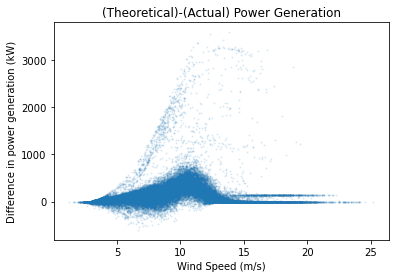

In [147]:
df_non_zero = df[df['LV ActivePower (kW)']!=0]
plt.scatter(df_non_zero['Wind Speed (m/s)'],df_non_zero['Theoretical_Power_Curve (KWh)']-df_non_zero['LV ActivePower (kW)'], alpha=0.1, marker='.', s=5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Difference in power generation (kW)')
plt.title('(Theoretical)-(Actual) Power Generation')

Text(0.5, 1.0, '(Theoretical)-(Actual) Power Generation')

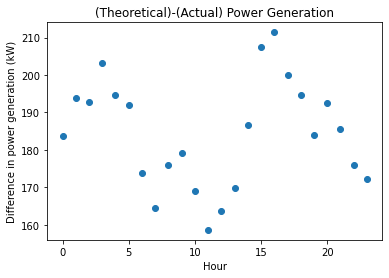

In [148]:
plt.scatter(group_hour['Hour'],group_hour['Theoretical_Power_Curve (KWh)']-group_hour['LV ActivePower (kW)'])
plt.xlabel('Hour')
plt.ylabel('Difference in power generation (kW)')
plt.title('(Theoretical)-(Actual) Power Generation')

Text(0.5, 1.0, '(Theoretical)-(Actual) Power Generation')

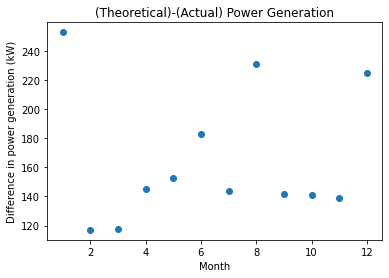

In [149]:
df['Month'] = df['Date/Time'].dt.month
df_non_zero = df[df['LV ActivePower (kW)']!=0]
group_month = df_non_zero.groupby('Month', as_index=False).mean()
plt.scatter(group_month['Month'],group_month['Theoretical_Power_Curve (KWh)']-group_month['LV ActivePower (kW)'])
plt.xlabel('Month')
plt.ylabel('Difference in power generation (kW)')
plt.title('(Theoretical)-(Actual) Power Generation')

>1월, 8월, 12월에 특히 (이론값)-(실제값)이 커지는 것을 알 수 있다.  
>덥거나 추운 시기라고 추측해 볼 수 있다.

/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_62907/1867663061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_season = df_non_zero[df.Month==1]


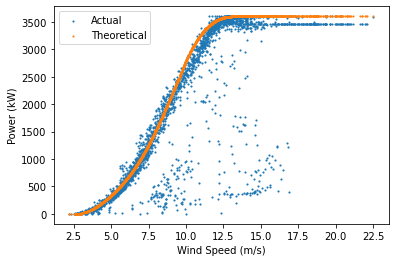

In [154]:
df_season = df_non_zero[df.Month==1]
plt.scatter('Wind Speed (m/s)','LV ActivePower (kW)',data=df_season, alpha=1, marker='.', s=5, label='Actual')
plt.scatter('Wind Speed (m/s)','Theoretical_Power_Curve (KWh)',data=df_season, alpha=1, marker='.', s=5, label='Theoretical')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_62907/3277814576.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_season = df_non_zero[df.Month==12]


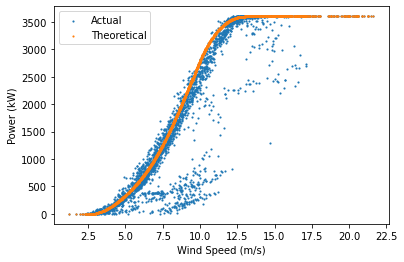

In [155]:
df_season = df_non_zero[df.Month==12]
plt.scatter('Wind Speed (m/s)','LV ActivePower (kW)',data=df_season, alpha=1, marker='.', s=5, label='Actual')
plt.scatter('Wind Speed (m/s)','Theoretical_Power_Curve (KWh)',data=df_season, alpha=1, marker='.', s=5, label='Theoretical')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

/var/folders/hb/vlbp26l11sjbyrlyv47j10c40000gn/T/ipykernel_62907/328439263.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_season = df_non_zero[df.Month==8]


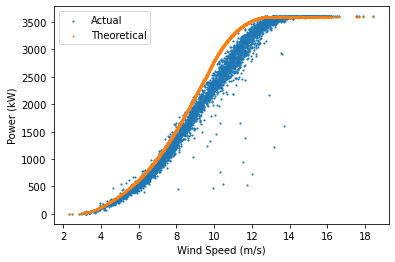

In [156]:
df_season = df_non_zero[df.Month==8]
plt.scatter('Wind Speed (m/s)','LV ActivePower (kW)',data=df_season, alpha=1, marker='.', s=5, label='Actual')
plt.scatter('Wind Speed (m/s)','Theoretical_Power_Curve (KWh)',data=df_season, alpha=1, marker='.', s=5, label='Theoretical')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

>* 기후가 비슷한 1월과 12월은 실제 발전량이 다양한 점에 분포하며 이론값보다 낮아졌고
>* 8월의 경우에는 이론값보다 낮고 균일한 분포를 가지고 있다.

## Conclusions

* 바람의 방향은 NE와 SSW가 주를 이뤘다.
* 11월에서 4월까지는 풍향이 SSW인 바람이, 4월부터 11월까지는 NE인 바람이 주를 이뤘다.
* 하루 중 풍속은 대체로 균일하지만, 5시부터 16시까지 풍속이 낮아졌고 11시에 가장 낮았다.
* 발전량은 풍속과 함께 증가한다.
* 풍속이 존재하는데 발전량이 0인 구간이 많다.
* 풍속이 아무리 빨라져도 발전량은 3600선에서 더 올라가지 않는다.
* 풍속이 있어도 발전이 되지 않는 때는 주로 겨울철인 1월, 12월, 2월이다.
* 발전량에서 이론값과 실제값이 차이가 커지는 달은 1월, 12월, 8월로 나타났다.
* 1월과 12월은 실제 발전량이 다양한 점에 분포하며 이론값보다 낮아졌다.
* 8월의 경우에는 발전량이 균일하지만 이론값 보다 낮은 분포를 보여줬다.